Restaurant Food Cost

Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

Dataset Attributes
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [11]:
train_data = pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx?raw=true')
train_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [ ]:
test_data = pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx?raw=true')
test_data

In [12]:
train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [13]:
train_data.head(20)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [14]:
train_data.tail(20)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12670,QUICK BITES,14118,"North Indian, Chinese, Momos, Mughlai, Rolls, ...",12:1pm – 4am (Mon-Sun),New Delhi,Janakpuri,3.6,40 votes,500
12671,"BEVERAGE SHOP,QUICK BITES",9086,"Juices, Fast Food",10:30am – 12midnight (Mon-Sun),Kochi,Marine Drive,3.3,10 votes,300
12672,QUICK BITES,14727,South Indian,7:30am – 7:30pm (Mon-Sun),Bangalore,Majestic,4.2,158 votes,200
12673,None,12011,"Fast Food, Rolls",11:30am – 10:30pm (Mon-Sun),New Delhi,Karol Bagh,4.0,617 votes,250
12674,"DESSERT PARLOR,BEVERAGE SHOP",13358,"Desserts, Beverages",11:30am – 1am (Mon-Sun),Hyderabad,Gachibowli,4.3,590 votes,350
12675,CASUAL DINING,2029,"Salad, Healthy Food, Juices",12noon – 10:30pm (Mon-Sun),Bandra West,Linking Road,4.5,2723 votes,900
12676,QUICK BITES,13369,North Indian,"11:30am – 4:30pm, 7pm – 11:30pm (Mon-Sun)",New Delhi,Karol Bagh,3.7,326 votes,350
12677,None,14196,Rolls,11am – 4:30am (Mon-Sun),Mumbai,Mahalaxmi,4.0,123 votes,550
12678,DESSERT PARLOR,14003,"Ice Cream, Desserts",10:30am – 11:30pm (Mon-Sun),Chennai,Anna Nagar East,3.9,59 votes,350
12679,QUICK BITES,6648,"Italian, Mediterranean",12:30pm – 9:45pm (Mon-Sun),Gurgaon,DLF Phase 3,4.3,68 votes,650


In [15]:
train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [16]:
train_data.columns.tolist()

['TITLE',
 'RESTAURANT_ID',
 'CUISINES',
 'TIME',
 'CITY',
 'LOCALITY',
 'RATING',
 'VOTES',
 'COST']

In [17]:
train_data.shape

(12690, 9)

In [19]:
train_data.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False,False


In [21]:
train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

<Axes: >

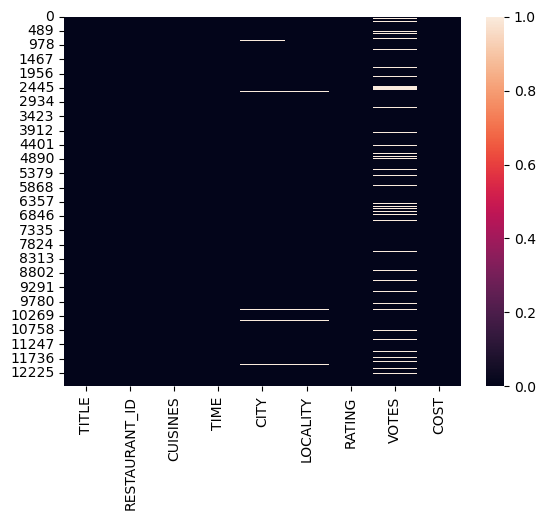

In [22]:
sns.heatmap(train_data.isnull())

In [23]:
train_data.info

<bound method DataFrame.info of                    TITLE  RESTAURANT_ID  \
0          CASUAL DINING           9438   
1      CASUAL DINING,BAR          13198   
2          CASUAL DINING          10915   
3            QUICK BITES           6346   
4         DESSERT PARLOR          15387   
...                  ...            ...   
12685        QUICK BITES          13228   
12686  CASUAL DINING,BAR           9686   
12687             LOUNGE          11133   
12688      CASUAL DINING           6134   
12689      CASUAL DINING           6430   

                                               CUISINES  \
0                           Malwani, Goan, North Indian   
1                        Asian, Modern Indian, Japanese   
2            North Indian, Chinese, Biryani, Hyderabadi   
3                                      Tibetan, Chinese   
4                                              Desserts   
...                                                 ...   
12685                       North Indi

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


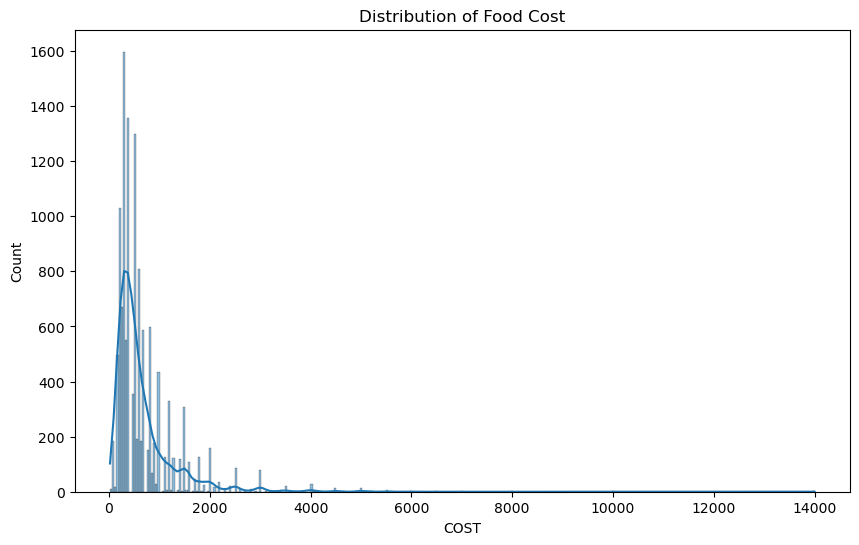

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['COST'], kde=True)
plt.title('Distribution of Food Cost')
plt.show()


C:\Users\Kasim\AppData\Local\Temp\ipykernel_9960\1806682117.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')


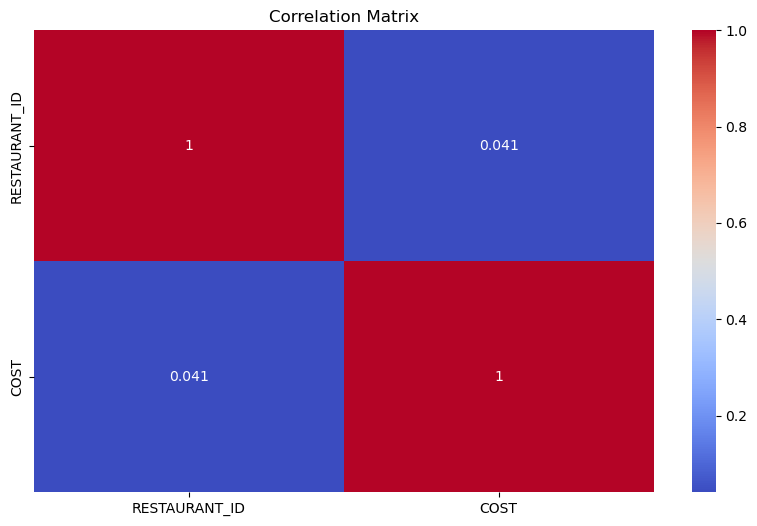

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
train_data['RATING'].fillna(train_data['RATING'].median(), inplace=True)
test_data['RATING'].fillna(test_data['RATING'].median(), inplace=True)


train_data['CUISINES'].fillna(train_data['CUISINES'].mode()[0], inplace=True)
test_data['CUISINES'].fillna(test_data['CUISINES'].mode()[0], inplace=True)
train_data['TIME'].fillna(train_data['TIME'].mode()[0], inplace=True)
test_data['TIME'].fillna(test_data['TIME'].mode()[0], inplace=True)


categorical_features = ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']
for col in categorical_features:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])


X = train_data.drop(['RESTAURANT_ID', 'COST'], axis=1)
y = train_data['COST']


scaler = StandardScaler()
numerical_features = ['RATING', 'VOTES']
X[numerical_features] = scaler.fit_transform(X[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_val)


mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae}")


X_test = test_data.drop(['RESTAURANT_ID'], axis=1)


test_predictions = model.predict(X_test)


submission = pd.DataFrame({'RESTAURANT_ID': test_data['RESTAURANT_ID'], 'PREDICTED_COST': test_predictions})
submission.to_csv('food_cost_predictions.csv', index=False)

print("Predictions saved to food_cost_predictions.csv")